<a href="https://colab.research.google.com/github/kalepravinkumars/2023_manufacturing_intelligence/blob/trasfer_learning/Manufacturing_Intelligence_ITR_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessery liberis into the session
import os
from cv2 import imread,imshow,cvtColor,COLOR_BGR2RGB,COLOR_BGR2GRAY,COLOR_RGB2GRAY,resize
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#directiry name
dir512x512='/content/drive/MyDrive/Colab Notebooks/CastingProductImageData/casting_512x512/casting_512x512'

In [ ]:
df_stats_def=pd.DataFrame()
# Get a list of all the files in the directory
extra='/def_front/'
directory=dir512x512+extra
files = os.listdir(directory)

# Filter the list to only include JPEG files
jpeg_files = [f for f in files if f.endswith('.jpeg')]
df_stats_def['filename']=jpeg_files


img_flat_data=np.array([cvtColor(imread(dir512x512+extra+f), COLOR_BGR2GRAY).flatten() for f in jpeg_files])
df_stats_def['mean']=[np.mean(cvtColor(imread(dir512x512+extra+f), COLOR_BGR2GRAY).flatten()) for f in jpeg_files]

df_f=pd.DataFrame(img_flat_data)


# Get a list of all the files in the directory
extra='/ok_front/'
directory=dir512x512+extra
files = os.listdir(directory)
df_stats_ok=pd.DataFrame()

# Filter the list to only include JPEG files
jpeg_files = [f for f in files if f.endswith('.jpeg')]
df_stats_ok['filename']=jpeg_files


img_flat_data=np.array([cvtColor(imread(dir512x512+extra+f), COLOR_BGR2GRAY).flatten() for f in jpeg_files])
df_stats_ok['mean']=[np.mean(cvtColor(imread(dir512x512+extra+f), COLOR_BGR2GRAY).flatten()) for f in jpeg_files]
df_p=pd.DataFrame(img_flat_data)

In [ ]:
df_p.head()

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,230,230,230,231,231,232,232,232,232,231,...,219,219,219,219,219,219,219,219,219,219
1,142,142,142,142,142,142,142,142,142,142,...,176,176,176,176,176,176,176,176,176,176
2,206,206,206,206,206,206,206,206,206,206,...,229,229,229,229,229,229,229,229,229,229
3,196,195,194,194,193,192,191,191,189,189,...,207,207,206,206,206,206,206,206,206,206
4,184,184,184,184,184,184,184,184,183,182,...,131,130,131,131,131,131,131,131,131,131


In [ ]:
df_stats_ok.head()

,filename,mean
0,cast_ok_0_1021.jpeg,157.919823
1,cast_ok_0_2060.jpeg,149.781364
2,cast_ok_0_1817.jpeg,140.542004
3,cast_ok_0_1573.jpeg,132.951736
4,cast_ok_0_1963.jpeg,134.799217


In [ ]:
df_stats_def.head()

,filename,mean
0,cast_def_0_100.jpeg,143.840778
1,cast_def_0_1053.jpeg,131.359814
2,cast_def_0_102.jpeg,142.420483
3,cast_def_0_1046.jpeg,133.569351
4,cast_def_0_1015.jpeg,132.420723


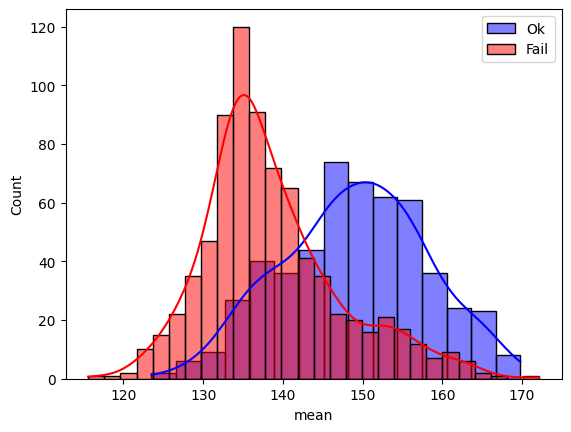

In [ ]:
sns.histplot(df_stats_ok['mean'], label='Ok', color='blue', alpha=0.5, kde=True)
sns.histplot(df_stats_def['mean'], label='Fail', color='red', alpha=0.5, kde=True)
# Add legend
plt.legend()

In [ ]:
#df_f=df_f[:300]
df_f.shape

(781, 262144)

In [ ]:
#df_p=df_p[:300]
df_p.shape

(519, 262144)

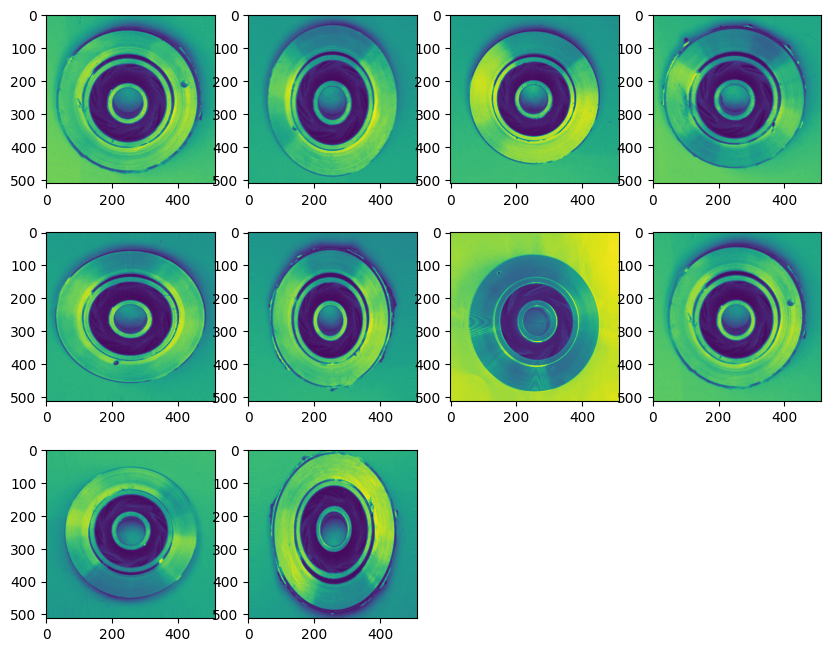

In [ ]:
#Fail or NoOkey or defective parts
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(df_f.iloc[i:i+1,:].values.reshape(512,512))

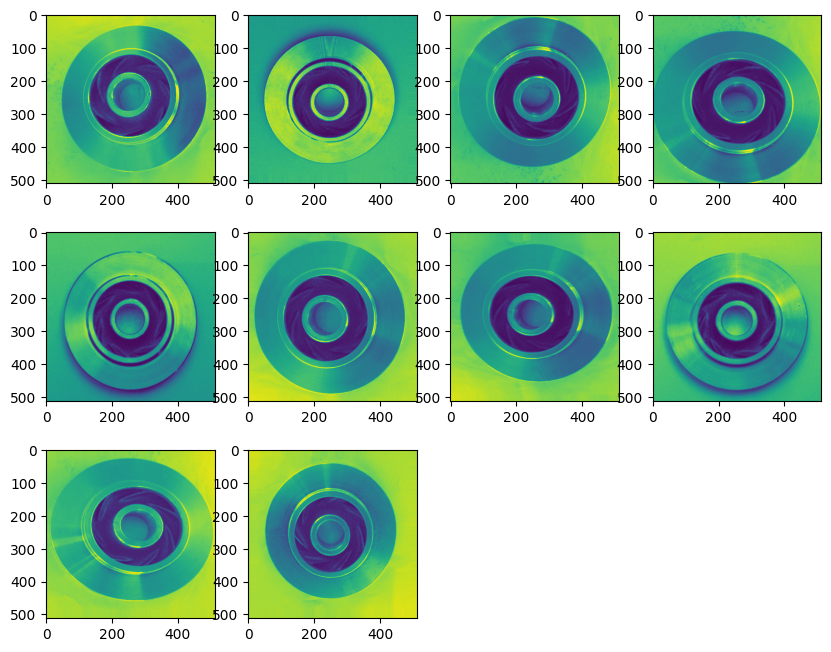

In [ ]:
#Pass or Okey or without defect parts
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(df_p.iloc[i:i+1,:].values.reshape(512,512))

In [ ]:
# Define Y or resonse
# 0 means Fail, and 1 mean Pass

df_f['Y']=0
df_p['Y']=1

In [ ]:
#Combine two dataframe
df=pd.concat([df_f,df_p], axis=0)
df.index=range(df.shape[0])
df.shape

(1300, 262145)

In [ ]:
#importing the Liberiers to create model
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Convolution2D,MaxPool2D,Flatten
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop(labels='Y', axis=1)

X=X.values.reshape(X.shape[0],512,512,1)
#X=np.expand_dims(X, axis=-1)

Y=df[['Y']].values

In [ ]:
Xtrain, Xtest, ytrain, ytest=train_test_split(X,Y,test_size=0.30,random_state=101 )

Model_1

In [ ]:
model=tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=16,kernel_size=(3,3), activation='relu', input_shape=(512,512,1)))
model.add(tf.keras.layers.MaxPool2D(
    (2,2)))
model.add(tf.keras.layers.Conv2D(
    filters=32,kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(
    (2,2)))
model.add(tf.keras.layers.Conv2D(
    filters=64,kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(
    (2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Define early stopping
early_stopping=EarlyStopping(monitor='val_loss', patience=5, mode='min')

In [ ]:
cnn_model=model.fit(Xtrain,ytrain, epochs=10, batch_size=32, validation_data=(Xtest,ytest), callbacks=[early_stopping])

Epoch 1/10
29/29 [==============================] - 20s 176ms/step - loss: 227.7377 - accuracy: 0.5890 - val_loss: 0.7482 - val_accuracy: 0.6821
Epoch 2/10
29/29 [==============================] - 3s 110ms/step - loss: 0.4532 - accuracy: 0.8033 - val_loss: 0.4870 - val_accuracy: 0.7744
Epoch 3/10
29/29 [==============================] - 3s 107ms/step - loss: 0.2014 - accuracy: 0.9220 - val_loss: 0.4007 - val_accuracy: 0.8359
Epoch 4/10
29/29 [==============================] - 3s 107ms/step - loss: 0.0801 - accuracy: 0.9758 - val_loss: 0.4140 - val_accuracy: 0.8282
Epoch 5/10
29/29 [==============================] - 3s 107ms/step - loss: 0.0337 - accuracy: 0.9978 - val_loss: 0.3915 - val_accuracy: 0.8564
Epoch 6/10
29/29 [==============================] - 3s 109ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 0.3471 - val_accuracy: 0.8744
Epoch 7/10
29/29 [==============================] - 3s 109ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.3921 - val_accuracy: 0.8769
Epo

In [ ]:
ytest_pred=cnn_model.predict(Xtest)

13/13 [==============================] - 0s 28ms/step


In [ ]:
for i in range(len(ytest_pred)):
    if ytest_pred[i]>0.5:
        ytest_pred[i]=1
    else:
        ytest_pred[i]=0

In [ ]:
print(confusion_matrix(ytest,ytest_pred))
print(classification_report(ytest,ytest_pred))

[[223  27]
 [ 24 116]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       250
           1       0.81      0.83      0.82       140

    accuracy                           0.87       390
   macro avg       0.86      0.86      0.86       390
weighted avg       0.87      0.87      0.87       390



# **Trasfer leanirng**

**popular pre-trained models for image classification**


1.   VGG (Visual Geometry Group) models
2.   ResNet (Residual Network) models
3.   Inception models
4.   MobileNet models
5.   DenseNet models



In [ ]:
#import library
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from keras.api._v2.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#directiry name
dir512x512='/content/drive/MyDrive/Colab Notebooks/CastingProductImageData/casting_512x512/casting_512x512'


df_stats_def=pd.DataFrame()
# Get a list of all the files in the directory
extra='/def_front/'
directory=dir512x512+extra
files = os.listdir(directory)

# Filter the list to only include JPEG files
jpeg_files = [f for f in files if f.endswith('.jpeg')]
df_stats_def['filename']=jpeg_files


img_fail=np.array([vgg16_preprocess_input(cv2.resize(imread(dir512x512+extra+f),(224, 224))) for f in jpeg_files])
img_fail_Y=np.zeros(img_fail.shape[0])


# Get a list of all the files in the directory
extra='/ok_front/'
directory=dir512x512+extra
files = os.listdir(directory)
df_stats_ok=pd.DataFrame()

# Filter the list to only include JPEG files
jpeg_files = [f for f in files if f.endswith('.jpeg')]
df_stats_ok['filename']=jpeg_files

img_ok=np.array([vgg16_preprocess_input(cv2.resize(imread(dir512x512+extra+f),(224, 224))) for f in jpeg_files])
img_ok_Y=np.ones(img_ok.shape[0])

combined_array=np.concatenate((img_fail,img_ok))
combined_array_Y=np.concatenate((img_fail_Y, img_ok_Y))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(combined_array,combined_array_Y,test_size=0.30, random_state=101)

In [ ]:
#base VGG16 model
base_vgg16 = VGG16(weights='imagenet', input_shape=(224,224,3), include_top=False)

x=base_vgg16.output
x=GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(128,activation='relu')(x)

# Add your own output layer for classification
predictions_vgg16 = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model_vgg16 = Model(inputs=base_vgg16.input, outputs=predictions_vgg16)

#Define early stopping
early_stopping=EarlyStopping(monitor='val_loss', patience=10, mode='min')

model_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_1=model_vgg16.fit(x=X_train, y=y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test), callbacks=early_stopping)

Epoch 1/100
15/15 [==============================] - 17s 812ms/step - loss: 14.8878 - accuracy: 0.5407 - val_loss: 0.6670 - val_accuracy: 0.6359
Epoch 2/100
15/15 [==============================] - 13s 856ms/step - loss: 0.6749 - accuracy: 0.5725 - val_loss: 0.6326 - val_accuracy: 0.6410
Epoch 3/100
15/15 [==============================] - 13s 859ms/step - loss: 0.6652 - accuracy: 0.6143 - val_loss: 0.7847 - val_accuracy: 0.6410
Epoch 4/100
15/15 [==============================] - 13s 862ms/step - loss: 0.7318 - accuracy: 0.5484 - val_loss: 0.6571 - val_accuracy: 0.6410
Epoch 5/100
15/15 [==============================] - 13s 862ms/step - loss: 0.6691 - accuracy: 0.5989 - val_loss: 0.6260 - val_accuracy: 0.6410
Epoch 6/100
15/15 [==============================] - 13s 870ms/step - loss: 0.6603 - accuracy: 0.5945 - val_loss: 0.6218 - val_accuracy: 0.6410
Epoch 7/100
15/15 [==============================] - 13s 872ms/step - loss: 0.6748 - accuracy: 0.5890 - val_loss: 0.6567 - val_accuracy

In [ ]:
y_test_tras_pred=model_vgg16.predict(X_test)

for i in range(len(y_test_tras_pred)):
    if y_test_tras_pred[i]>0.5:
        y_test_tras_pred[i]=1
    else:
        y_test_tras_pred[i]=0

print(confusion_matrix(y_test,y_test_tras_pred))
print(classification_report(y_test,y_test_tras_pred))

13/13 [==============================] - 1s 118ms/step
[[249   1]
 [  0 140]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       250
         1.0       0.99      1.00      1.00       140

    accuracy                           1.00       390
   macro avg       1.00      1.00      1.00       390
weighted avg       1.00      1.00      1.00       390



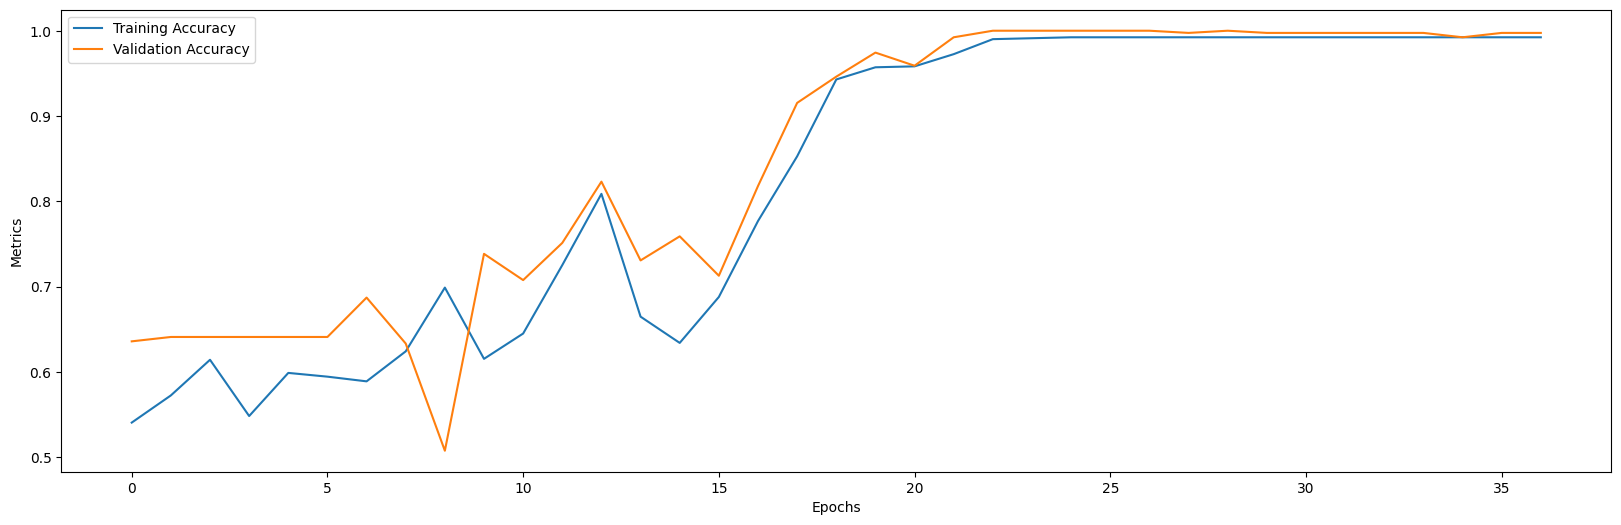

In [ ]:
plt.figure(figsize=(20,6))
#plt.plot(model_1.history['loss'], label='Training Loss')
#plt.plot(model_1.history['val_loss'], label='Validation Loss')
plt.plot(model_1.history['accuracy'], label='Training Accuracy')
plt.plot(model_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()


Vgg19 model

In [ ]:
#import liberies
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input

In [ ]:
#directiry name
dir512x512='/content/drive/MyDrive/Colab Notebooks/CastingProductImageData/casting_512x512/casting_512x512'


df_stats_def=pd.DataFrame()
# Get a list of all the files in the directory
extra='/def_front/'
directory=dir512x512+extra
files = os.listdir(directory)

# Filter the list to only include JPEG files
jpeg_files = [f for f in files if f.endswith('.jpeg')]
df_stats_def['filename']=jpeg_files


img_fail_vgg19=np.array([vgg19_preprocess_input(cv2.resize(imread(dir512x512+extra+f),(224, 224))) for f in jpeg_files])
img_fail_Y=np.zeros(img_fail.shape[0])


# Get a list of all the files in the directory
extra='/ok_front/'
directory=dir512x512+extra
files = os.listdir(directory)
df_stats_ok=pd.DataFrame()

# Filter the list to only include JPEG files
jpeg_files = [f for f in files if f.endswith('.jpeg')]
df_stats_ok['filename']=jpeg_files

img_ok_vgg19=np.array([vgg19_preprocess_input(cv2.resize(imread(dir512x512+extra+f),(224, 224))) for f in jpeg_files])
img_ok_Y=np.ones(img_ok.shape[0])

combined_array=np.concatenate((img_fail_vgg19,img_ok_vgg19))
combined_array_Y=np.concatenate((img_fail_Y, img_ok_Y))

In [ ]:
#base VGG19 model
base_vgg19 = VGG16(weights='imagenet', input_shape=(224,224,3), include_top=False)

x=base_vgg19.output
x=GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(128,activation='relu')(x)

# Add your own output layer for classification
predictions_vgg19 = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model_vgg19 = Model(inputs=base_vgg19.input, outputs=predictions_vgg19)

#Define early stopping
early_stopping=EarlyStopping(monitor='val_loss', patience=10, mode='min')

model_vgg19.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2=model_vgg19.fit(x=X_train, y=y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test), callbacks=early_stopping)

Epoch 1/100
15/15 [==============================] - 17s 816ms/step - loss: 23.2278 - accuracy: 0.4857 - val_loss: 0.6403 - val_accuracy: 0.6410
Epoch 2/100
15/15 [==============================] - 13s 856ms/step - loss: 0.6873 - accuracy: 0.5857 - val_loss: 0.6504 - val_accuracy: 0.6410
Epoch 3/100
15/15 [==============================] - 13s 871ms/step - loss: 0.6772 - accuracy: 0.5659 - val_loss: 0.6596 - val_accuracy: 0.6410
Epoch 4/100
15/15 [==============================] - 13s 862ms/step - loss: 0.6788 - accuracy: 0.5835 - val_loss: 0.6630 - val_accuracy: 0.6410
Epoch 5/100
15/15 [==============================] - 12s 781ms/step - loss: 0.6797 - accuracy: 0.5835 - val_loss: 0.6535 - val_accuracy: 0.6410
Epoch 6/100
15/15 [==============================] - 13s 866ms/step - loss: 0.6711 - accuracy: 0.5835 - val_loss: 0.6375 - val_accuracy: 0.6410
Epoch 7/100
15/15 [==============================] - 12s 787ms/step - loss: 0.6688 - accuracy: 0.5835 - val_loss: 0.6445 - val_accuracy

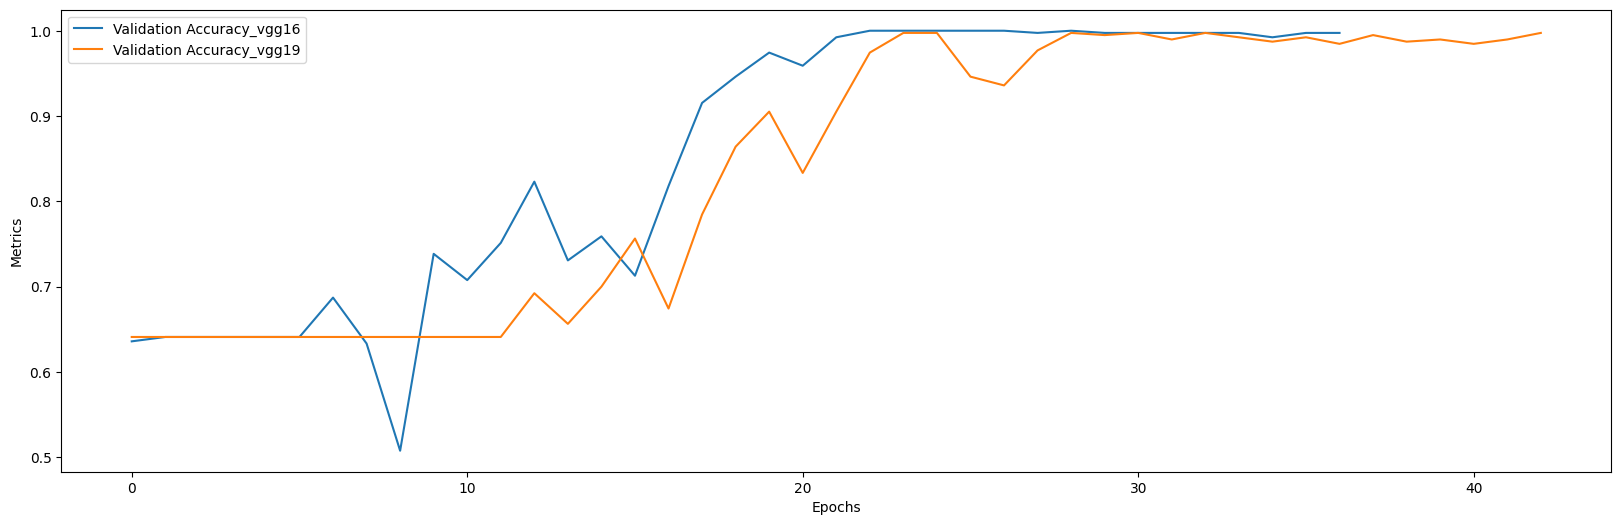

In [ ]:
plt.figure(figsize=(20,6))
#plt.plot(model_2.history['loss'], label='Training Loss')
#plt.plot(model_2.history['val_loss'], label='Validation Loss')
#plt.plot(model_1.history['accuracy'], label='Training Accuracy_vgg16')
plt.plot(model_1.history['val_accuracy'], label='Validation Accuracy_vgg16')
#plt.plot(model_2.history['accuracy'], label='Training Accuracy_vgg19')
plt.plot(model_2.history['val_accuracy'], label='Validation Accuracy_vgg19')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()

# RestNet



1.   RestNet18(Not available in Tensorflow)
2.   RestNet34 (Not available in Tensorflow)
3.   RestNet50
4.   RestNet101
5.   RestNet150



In [ ]:
RestNet